In [1]:
#from io import BytesIO
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
path = os.getcwd()[:-11] +"\\TestComponents\\TestSets\\WS2"

In [3]:
observed_data = pd.read_csv(path + "\\observed.csv",index_col=0)
observed_data.sort_index(axis=0,inplace=True)
observed_data.index=pd.to_datetime(observed_data.index,format="%d/%m/%Y %H:%M")

In [4]:
tests = []
test_names = []
for file in os.listdir(path+"\\Outputs"):
    if file.endswith('.csv'):
        tests.append(file)       
        test_names.append(os.path.splitext(file)[0])

In [6]:
Alltests =[]
for t in tests[:]:  
    testframe = pd.read_csv(path+"\\Outputs\\"+t,index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=test_names)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

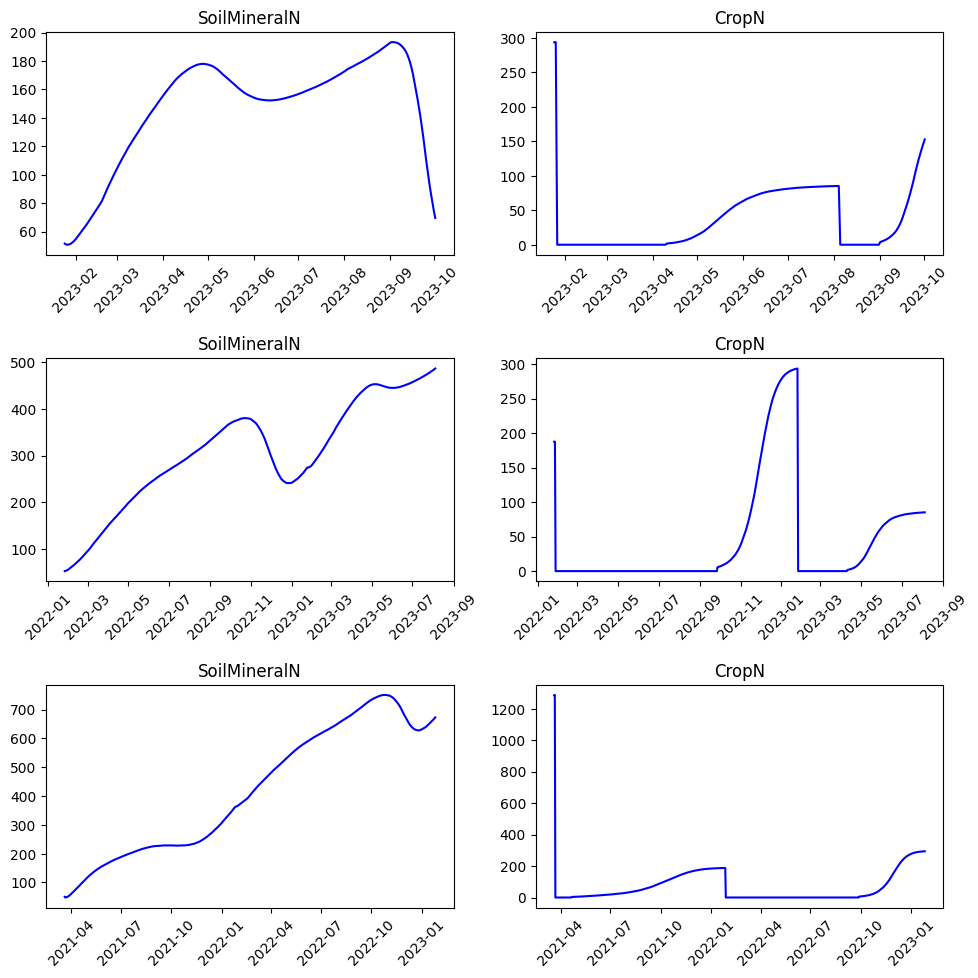

In [7]:
colors = pd.Series(['r','b','g'])
        
Graph = plt.figure(figsize=(10,10))
pos = 1
row_num=len(test_names)

for t in test_names:
    start = dt.datetime.date(AllData[t].dropna().index.min())
    end = dt.datetime.date(AllData[t].dropna().index.max())
    datefilter = []
    for d in observed_data.index:
        ret = False
        if ((d >= pd.Timestamp(start)) and (d<=pd.Timestamp(end))):
            ret = True
            # if site id matching the observed id make it true only then 
        datefilter.append(ret)
        
    color = 'b'
    Graph.add_subplot(row_num,2,pos)
    Data = AllData.loc[:,(t,'SoilMineralN')].sort_index()
    plt.xticks(rotation = 45)    
    plt.title("SoilMineralN")
    plt.plot(Data,color=color)
    #make_observed(observed_data[datefilter])
    Graph.tight_layout(pad=1.5)
    pos+=1
    
    Graph.add_subplot(row_num,2,pos)
    plt.xticks(rotation = 45)  
    plt.title("CropN")
    Data = AllData.loc[:,(t,'CropN')].sort_index()
    plt.plot(Data,color=color)
    #make_observed(observed_data[datefilter])
    pos+=1

plt.savefig(path+'\\TimeCourse.png')
